In [5]:
!pip install tqdm



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


Preprocessing

In [2]:
import os
import cv2
import numpy as np

# Define paths
path_train = "../data/training/"
path_test = "../data/testing/"
img_size = 300  # Resized image size

# Initialize lists
train_img, train_labels = [], []
test_img, test_labels = [], []

# Function to load images safely and check for black images
def load_images_from_directory(directory, img_list, label_list, dataset_name):
    black_image_count = 0

    for category in os.listdir(directory):  # Loop through class folders
        category_path = os.path.join(directory, category)

        # 🛑 Skip non-directory files (e.g., .DS_Store)
        if not os.path.isdir(category_path):
            continue
        
        for img_name in os.listdir(category_path):
            img_path = os.path.join(category_path, img_name)

            # Read image
            img = cv2.imread(img_path)
            if img is None:
                print(f"⚠️ Warning: Failed to load {img_path}, skipping.")
                continue  # Skip corrupt images

            # Resize image
            img = cv2.resize(img, (img_size, img_size))

            # Check if image is completely black (all zeros)
            if np.all(img == 0):
                black_image_count += 1
                print(f"⚠️ Warning: Black image detected: {img_path}, skipping.")
                continue  # Skip black images
            
            # Append to lists
            img_list.append(img)
            label_list.append(category)

    print(f"⚠️ {black_image_count} completely black images found in {dataset_name} data.")

# Load training images
load_images_from_directory(path_train, train_img, train_labels, "training")

# Load testing images
load_images_from_directory(path_test, test_img, test_labels, "test")

# Convert lists to numpy arrays
train_img = np.array(train_img)
test_img = np.array(test_img)

# Encode labels: 0 - No Tumor, 1 - Glioma, 2 - Meningioma, 3 - Pituitary
label_mapping = {"no_tumor": 0, "glioma_tumor": 1, "meningioma_tumor": 2, "pituitary_tumor": 3}
train_labels_encoded = np.array([label_mapping[label] for label in train_labels])
test_labels_encoded = np.array([label_mapping[label] for label in test_labels])

print(f"Loaded {len(train_img)} training images and {len(test_img)} test images.")
print(f"Labels: {np.unique(train_labels_encoded, return_counts=True)}")


⚠️ 0 completely black images found in training data.
⚠️ 0 completely black images found in test data.
Loaded 2870 training images and 394 test images.
Labels: (array([0, 1, 2, 3]), array([395, 826, 822, 827]))


Extracting features from images...


100%|██████████| 2870/2870 [00:51<00:00, 55.43it/s]


Applying PCA to reduce dimensions from 46676 to 100
Explained variance ratio: 1.0000
Extracted features shape: (2870, 100)
Tumor areas shape: (2870,)
Unique labels in the dataset: [0 1 2 3]
Categories present in the dataset: ['no_tumor', 'glioma_tumor', 'meningioma_tumor', 'pituitary_tumor']


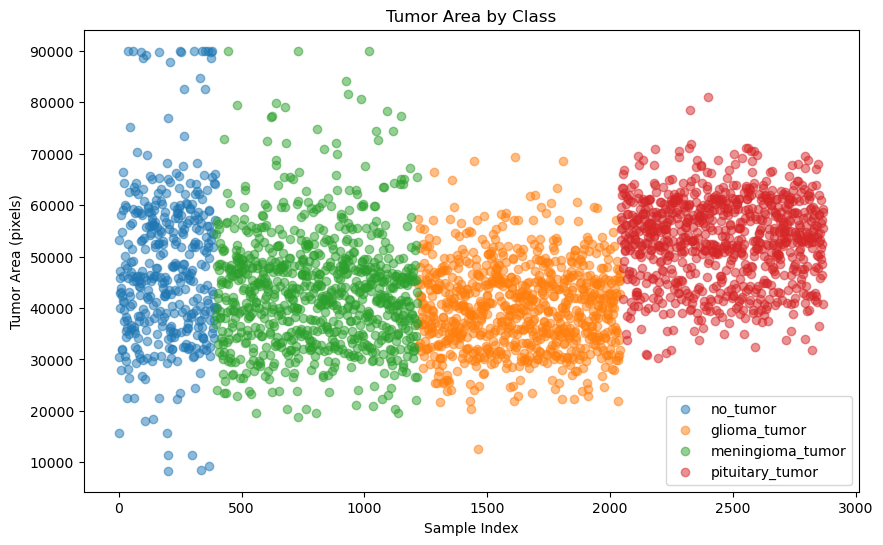

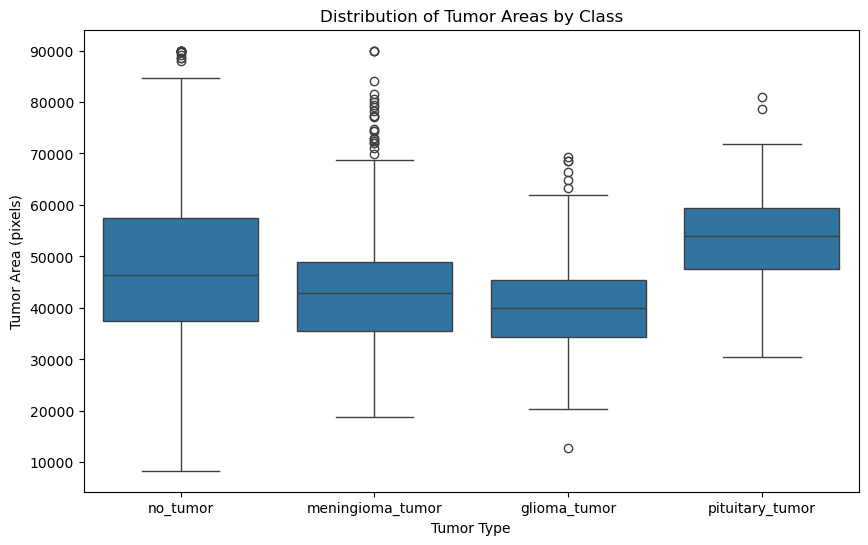

Feature statistics:
Mean feature values: [-4.09240926e-12  7.03921629e-14 -1.50205052e-15 -6.84516323e-15
  2.34259379e-14]... (first 5 values)
Min feature values: [-3.76144114e+04 -6.32724146e+01 -6.81284727e+01 -1.89641059e+01
 -1.45857347e+01]... (first 5 values)
Max feature values: [44019.84773589   130.83808741    75.13667318   118.75659206
    75.86979178]... (first 5 values)
Std dev of features: [1.16152877e+04 2.25068267e+01 1.04626722e+01 9.54775741e+00
 6.89664012e+00]... (first 5 values)

Tumor area statistics by class:
no_tumor:
  Count: 395
  Mean area: 48138.45 pixels
  Min area: 8366.0
  Max area: 90000.0
  Std dev: 15123.02 pixels
glioma_tumor:
  Count: 826
  Mean area: 40110.07 pixels
  Min area: 12677.0
  Max area: 69382.0
  Std dev: 8303.29 pixels
meningioma_tumor:
  Count: 822
  Mean area: 43473.48 pixels
  Min area: 18870.0
  Max area: 90000.0
  Std dev: 11193.71 pixels
pituitary_tumor:
  Count: 827
  Mean area: 53304.46 pixels
  Min area: 30370.0
  Max area: 81029

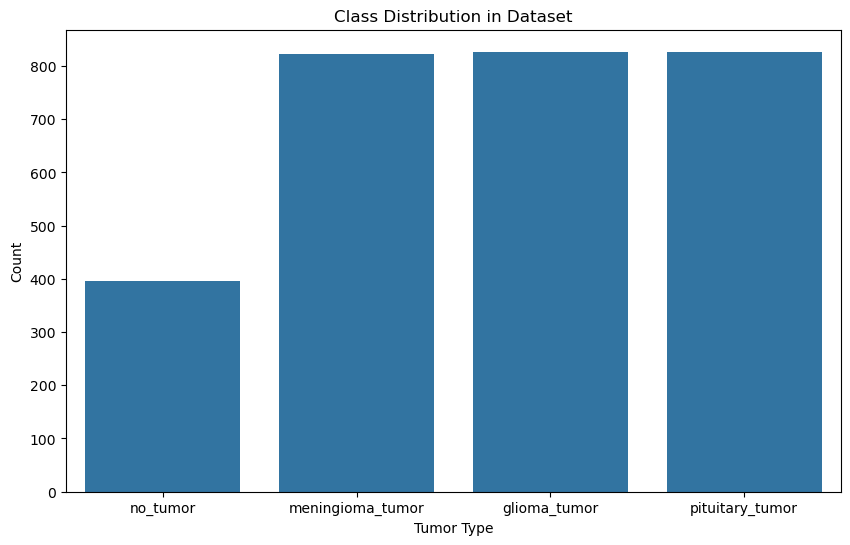


Training set shape: (2296, 100), (2296,)
Validation set shape: (574, 100), (574,)

Class distribution in training set:
  no_tumor: 316 samples
  glioma_tumor: 661 samples
  meningioma_tumor: 657 samples
  pituitary_tumor: 662 samples

Class distribution in validation set:
  no_tumor: 79 samples
  glioma_tumor: 165 samples
  meningioma_tumor: 165 samples
  pituitary_tumor: 165 samples

Accuracy using only tumor area: 0.4686

Classification Report using only tumor area:
                  precision    recall  f1-score   support

        no_tumor       0.00      0.00      0.00        79
    glioma_tumor       0.45      0.62      0.52       165
meningioma_tumor       0.38      0.27      0.32       165
 pituitary_tumor       0.53      0.73      0.61       165

        accuracy                           0.47       574
       macro avg       0.34      0.41      0.36       574
    weighted avg       0.39      0.47      0.42       574



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


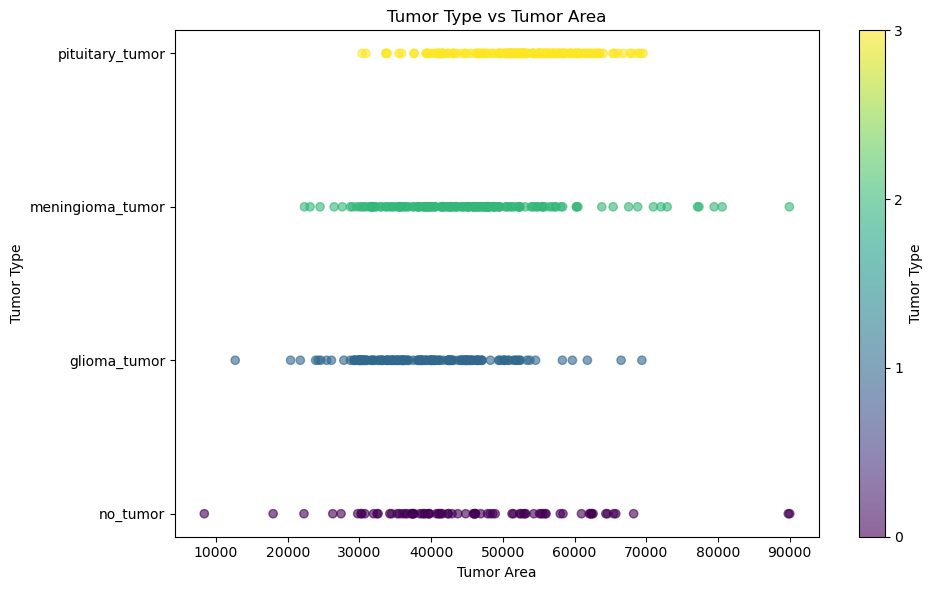

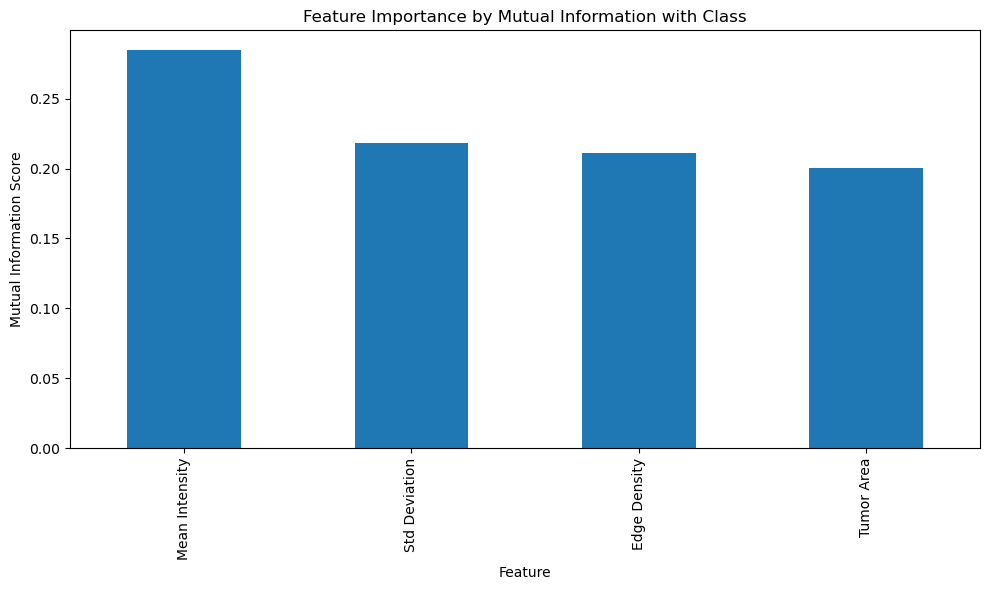

In [3]:
# Feature extraction code
from skimage.feature import hog, local_binary_pattern
from skimage.measure import regionprops, label
from sklearn.decomposition import PCA
import seaborn as sns
import pandas as pd
import os
import matplotlib.pyplot as plt
from tqdm import tqdm


# Define categories
categories = ["no_tumor", "glioma_tumor", "meningioma_tumor", "pituitary_tumor"]

# extracting tumor area via thresholding and connected components
# returns area of largest connected component (aka likely the tumor)
def extract_tumor_area(image, threshold=30):
    # convert to grayscale if it's a color image
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # applying threshold to segment the image
    _, binary = cv2.threshold(image, threshold, 255, cv2.THRESH_BINARY)
    
    # find connected components
    labeled_img = label(binary)
    regions = regionprops(labeled_img)
    
    if not regions:
        return 0

    return max(region.area for region in regions)

# extracting HOG features
# captures shape and edge information from the image
def extract_hog_features(image):
    # convert to grayscale if it's a color image
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        
    features = hog(image, orientations=9, pixels_per_cell=(8, 8),
                  cells_per_block=(2, 2), visualize=False)
    return features

# extracting LBP features
# captures texture information from the image
def extract_lbp_features(image, P=8, R=1):
    # convert to grayscale if it's a color image
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        
    # compute LBP
    lbp = local_binary_pattern(image, P, R, method='uniform')
    # create histogram
    hist, _ = np.histogram(lbp, bins=P+2, range=(0, P+2), density=True)
    return hist

# extracting statistical features
# captures distribution characteristics of pixel values
def extract_statistical_features(image):
    # convert to grayscale if it's a color image
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        
    features = []
    # mean intensity
    features.append(np.mean(image))
    # standard deviation
    features.append(np.std(image))
    # skewness
    features.append(np.mean(((image - np.mean(image)) / np.std(image))**3))
    # kurtosis
    features.append(np.mean(((image - np.mean(image)) / np.std(image))**4) - 3)
    # min and max values
    features.append(np.min(image))
    features.append(np.max(image))
    # median
    features.append(np.median(image))
    # 25th and 75th percentiles
    features.append(np.percentile(image, 25))
    features.append(np.percentile(image, 75))
    return features

# extract features from all images
# combines multiple feature types and applies PCA if requested
def extract_all_features(X, y, use_pca=True, n_components=100):
    print("Extracting features from images...")
    all_features = []
    tumor_areas = []
    
    for i in tqdm(range(len(X))):
        image = X[i]  # use the image directly
        
        # extract tumor area
        tumor_area = extract_tumor_area(image)
        tumor_areas.append(tumor_area)
        
        # extract HOG features
        hog_features = extract_hog_features(image)
        
        # extract LBP features
        lbp_features = extract_lbp_features(image)
        
        # extract statistical features
        stat_features = extract_statistical_features(image)
        
        # combine all features
        combined_features = np.concatenate([hog_features, lbp_features, stat_features, [tumor_area]])
        all_features.append(combined_features)
    
    # convert to numpy array
    feature_array = np.array(all_features)
    
    # apply PCA if requested
    if use_pca and feature_array.shape[1] > n_components:
        print(f"Applying PCA to reduce dimensions from {feature_array.shape[1]} to {n_components}")
        pca = PCA(n_components=n_components)
        feature_array = pca.fit_transform(feature_array)
        print(f"Explained variance ratio: {sum(pca.explained_variance_ratio_):.4f}")
    
    # create array for tumor areas
    tumor_areas = np.array(tumor_areas)
    
    return feature_array, tumor_areas

# apply feature extraction to the data
X_features, tumor_areas = extract_all_features(train_img, train_labels_encoded, use_pca=True, n_components=100)

print(f"Extracted features shape: {X_features.shape}")
print(f"Tumor areas shape: {tumor_areas.shape}")

# Check which labels are present in the data
unique_labels = np.unique(train_labels_encoded)
print(f"Unique labels in the dataset: {unique_labels}")

# Check the mapping of labels to categories
categories = ['no_tumor', 'glioma_tumor', 'meningioma_tumor', 'pituitary_tumor']
present_categories = [categories[i] for i in unique_labels]
print(f"Categories present in the dataset: {present_categories}")

# analyze relationship between tumor area and class
plt.figure(figsize=(10, 6))
for i in unique_labels:
    plt.scatter(np.where(train_labels_encoded == i)[0], tumor_areas[train_labels_encoded == i], 
                alpha=0.5, label=categories[i])
plt.xlabel('Sample Index')
plt.ylabel('Tumor Area (pixels)')
plt.title('Tumor Area by Class')
plt.legend()
plt.show()

# box plot of tumor areas by class
plt.figure(figsize=(10, 6))
sns.boxplot(x=[categories[label] for label in train_labels_encoded], y=tumor_areas)
plt.xlabel('Tumor Type')
plt.ylabel('Tumor Area (pixels)')
plt.title('Distribution of Tumor Areas by Class')
plt.show()

# Print some basic statistics about the features
print(f"Feature statistics:")
print(f"Mean feature values: {np.mean(X_features, axis=0)[:5]}... (first 5 values)")
print(f"Min feature values: {np.min(X_features, axis=0)[:5]}... (first 5 values)")
print(f"Max feature values: {np.max(X_features, axis=0)[:5]}... (first 5 values)")
print(f"Std dev of features: {np.std(X_features, axis=0)[:5]}... (first 5 values)")

# Print statistics about tumor areas by class
print("\nTumor area statistics by class:")
for i in unique_labels:
    class_areas = tumor_areas[train_labels_encoded == i]
    print(f"{categories[i]}:")
    print(f"  Count: {len(class_areas)}")
    print(f"  Mean area: {np.mean(class_areas):.2f} pixels")
    print(f"  Min area: {np.min(class_areas)}")
    print(f"  Max area: {np.max(class_areas)}")
    print(f"  Std dev: {np.std(class_areas):.2f} pixels")

# analyze class distribution
plt.figure(figsize=(10, 6))
sns.countplot(x=[categories[label] for label in train_labels_encoded])
plt.xlabel('Tumor Type')
plt.ylabel('Count')
plt.title('Class Distribution in Dataset')
plt.show()

# split data into training and validation sets (just for analysis, not saving yet)
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val, tumor_areas_train, tumor_areas_val = train_test_split(
    X_features, train_labels_encoded, tumor_areas, test_size=0.2, random_state=42, stratify=train_labels_encoded
)

print(f"\nTraining set shape: {X_train.shape}, {y_train.shape}")
print(f"Validation set shape: {X_val.shape}, {y_val.shape}")

# Check class distribution in train and validation sets
train_class_counts = np.bincount(y_train)
val_class_counts = np.bincount(y_val)
print("\nClass distribution in training set:")
for i in unique_labels:
    print(f"  {categories[i]}: {train_class_counts[i]} samples")
print("\nClass distribution in validation set:")
for i in unique_labels:
    print(f"  {categories[i]}: {val_class_counts[i]} samples")

# analyze feature importance for tumor area
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# reshape tumor areas for sklearn
tumor_areas_train_reshaped = tumor_areas_train.reshape(-1, 1)
tumor_areas_val_reshaped = tumor_areas_val.reshape(-1, 1)

# train logistic regression on just tumor area
lr_tumor = LogisticRegression(max_iter=1000)
lr_tumor.fit(tumor_areas_train_reshaped, y_train)

# evaluate
y_pred_tumor = lr_tumor.predict(tumor_areas_val_reshaped)
tumor_only_accuracy = accuracy_score(y_val, y_pred_tumor)

print(f"\nAccuracy using only tumor area: {tumor_only_accuracy:.4f}")
print("\nClassification Report using only tumor area:")
print(classification_report(y_val, y_pred_tumor, target_names=present_categories))

# visualize decision boundaries based on tumor area
plt.figure(figsize=(10, 6))
# Create a scatter plot of tumor areas vs. labels
plt.scatter(tumor_areas_val, y_val, c=y_val, cmap='viridis', alpha=0.6)
plt.xlabel('Tumor Area')
plt.ylabel('Tumor Type')
plt.title('Tumor Type vs Tumor Area')
plt.yticks(range(len(present_categories)), present_categories)
plt.colorbar(ticks=range(len(present_categories)), label='Tumor Type')
plt.tight_layout()
plt.show()

# correlation analysis between features and labels
from sklearn.feature_selection import mutual_info_classif

# creating a small subset of the original features without PCA for analysis
n_samples = min(500, len(train_img))  # Use a smaller subset for faster computation
subset_indices = np.random.choice(len(train_img), n_samples, replace=False)
subset_X = train_img[subset_indices]
subset_y = train_labels_encoded[subset_indices]

# extracting a smaller set of interpretable features
interpretable_features = []
feature_names = ["Mean Intensity", "Std Deviation", "Tumor Area", "Edge Density"]

for i in range(n_samples):
    img = subset_X[i]
    # Convert to grayscale
    if len(img.shape) == 3:
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    else:
        img_gray = img
        
    # Extract simple statistical features
    features = []
    # Mean intensity
    features.append(np.mean(img_gray))
    # Standard deviation
    features.append(np.std(img_gray))
    # Tumor area
    features.append(extract_tumor_area(img))
    # Edge density (using Canny edge detector)
    edges = cv2.Canny(img_gray, 100, 200)
    features.append(np.sum(edges) / (img_gray.shape[0] * img_gray.shape[1]))
    
    interpretable_features.append(features)

interpretable_features = np.array(interpretable_features)

# calculating mutual information between features and labels
mi_scores = mutual_info_classif(interpretable_features, subset_y)
mi_scores = pd.Series(mi_scores, index=feature_names)
mi_scores = mi_scores.sort_values(ascending=False)

# plotting feature importance
plt.figure(figsize=(10, 6))
mi_scores.plot.bar()
plt.title('Feature Importance by Mutual Information with Class')
plt.xlabel('Feature')
plt.ylabel('Mutual Information Score')
plt.tight_layout()
plt.show()


# save the extracted features
os.makedirs('../data/processed', exist_ok=True)
np.save('../data/processed/X_features.npy', X_features)
np.save('../data/processed/tumor_areas.npy', tumor_areas)
np.save('../data/processed/y_labels.npy', train_labels_encoded)

# save the split datasets
np.save('../data/processed/X_train.npy', X_train)
np.save('../data/processed/X_val.npy', X_val)
np.save('../data/processed/y_train.npy', y_train)
np.save('../data/processed/y_val.npy', y_val)
np.save('../data/processed/tumor_areas_train.npy', tumor_areas_train)
np.save('../data/processed/tumor_areas_val.npy', tumor_areas_val)



Logistic Regression using PCA:

Validation Accuracy: 0.8328

Classification Report:
                  precision    recall  f1-score   support

        no_tumor       0.79      0.81      0.80        79
    glioma_tumor       0.89      0.84      0.86       165
meningioma_tumor       0.75      0.75      0.75       165
 pituitary_tumor       0.87      0.93      0.90       165

        accuracy                           0.83       574
       macro avg       0.83      0.83      0.83       574
    weighted avg       0.83      0.83      0.83       574



/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


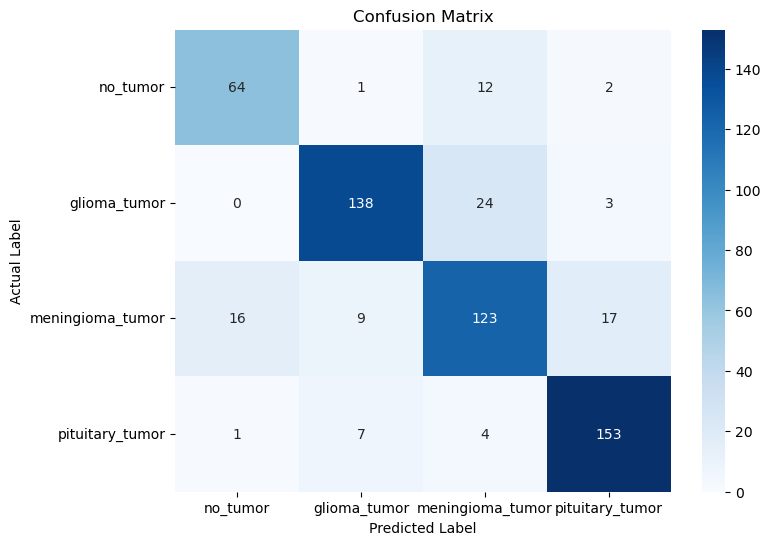

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train a logistic regression model
log_reg = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='multinomial', random_state=42)
log_reg.fit(X_train, y_train)

# Make predictions on validation set
y_pred = log_reg.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {accuracy:.4f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_val, y_pred, target_names=present_categories))

# Confusion matrix visualization
conf_matrix = confusion_matrix(y_val, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=present_categories, yticklabels=present_categories)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()


lasso regression for Feature Selection instead of PCA:

Extracting features from images...


100%|██████████| 2870/2870 [00:53<00:00, 53.57it/s]



L1-Regularized Logistic Regression Accuracy: 0.4948

Classification Report (L1):
                  precision    recall  f1-score   support

        no_tumor       0.00      0.00      0.00        79
    glioma_tumor       0.53      0.67      0.59       165
meningioma_tumor       0.37      0.24      0.29       165
 pituitary_tumor       0.52      0.81      0.63       165

        accuracy                           0.49       574
       macro avg       0.35      0.43      0.38       574
    weighted avg       0.41      0.49      0.44       574



/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predic

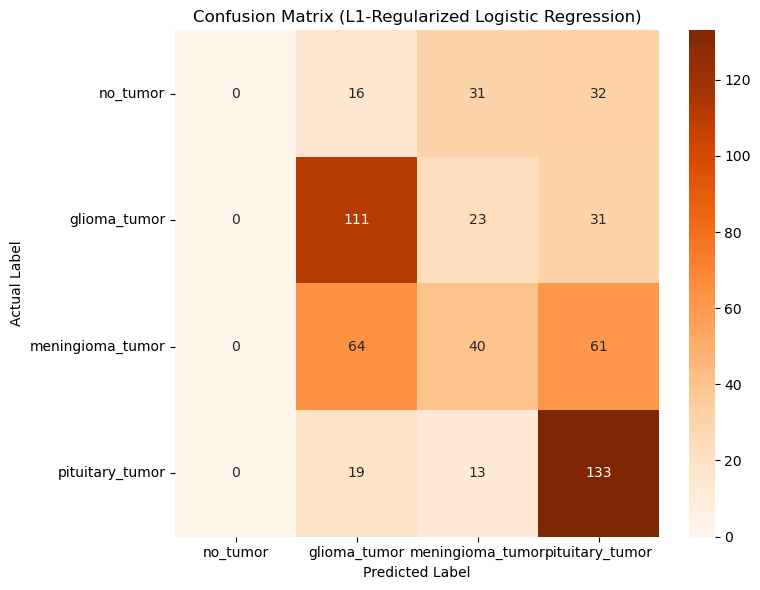


L1 selected 46645 features out of 46676 total features.


In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

# Re-extract features WITHOUT PCA if not already done
X_no_pca, _ = extract_all_features(train_img, train_labels_encoded, use_pca=False)

# Split data into train/val sets
X_train_l1, X_val_l1, y_train_l1, y_val_l1 = train_test_split(
    X_no_pca, train_labels_encoded, test_size=0.2, random_state=42, stratify=train_labels_encoded
)

# Fit L1-regularized logistic regression (saga supports L1 for multiclass)
log_reg_l1 = LogisticRegression(
    penalty='l1', solver='saga', multi_class='multinomial', C=1.0, max_iter=2000, random_state=42
)
log_reg_l1.fit(X_train_l1, y_train_l1)

# Predict
y_pred_l1 = log_reg_l1.predict(X_val_l1)

# Evaluate
acc_l1 = accuracy_score(y_val_l1, y_pred_l1)
print(f"\nL1-Regularized Logistic Regression Accuracy: {acc_l1:.4f}")
print("\nClassification Report (L1):")
print(classification_report(y_val_l1, y_pred_l1, target_names=present_categories))

# Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_val_l1, y_pred_l1), annot=True, fmt='d', cmap='Oranges', 
            xticklabels=present_categories, yticklabels=present_categories)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix (L1-Regularized Logistic Regression)')
plt.tight_layout()
plt.show()

# Analyze how many features were selected (non-zero coefficients)
non_zero_mask = np.any(log_reg_l1.coef_ != 0, axis=0)
num_selected = np.sum(non_zero_mask)
print(f"\nL1 selected {num_selected} features out of {X_train_l1.shape[1]} total features.")


Extracting features from images...


100%|██████████| 2870/2870 [00:52<00:00, 55.12it/s]



L1-Regularized Logistic Regression Accuracy: 0.4948

Classification Report (L1):
                  precision    recall  f1-score   support

        no_tumor       0.00      0.00      0.00        79
    glioma_tumor       0.53      0.67      0.59       165
meningioma_tumor       0.37      0.24      0.29       165
 pituitary_tumor       0.52      0.81      0.63       165

        accuracy                           0.49       574
       macro avg       0.35      0.43      0.38       574
    weighted avg       0.41      0.49      0.44       574



/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predic

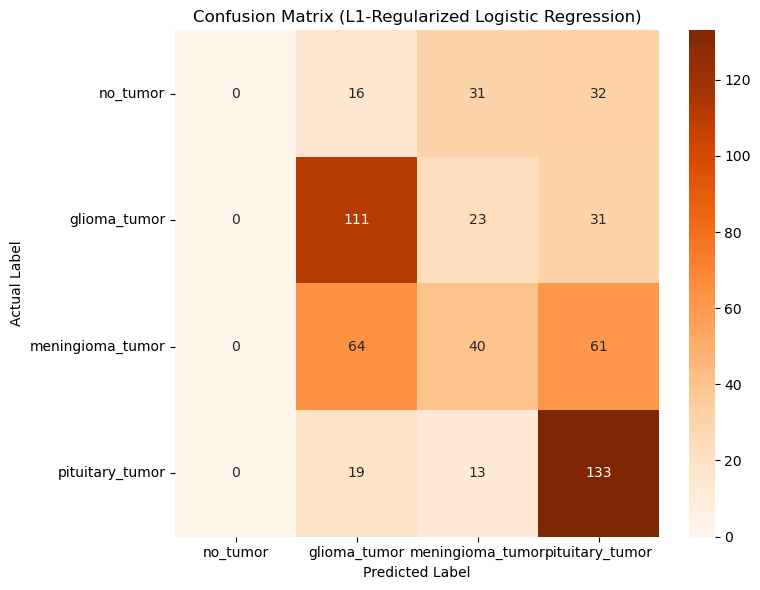


L1 selected 46387 features out of 46676 total features.


In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

# Re-extract features WITHOUT PCA if not already done
X_no_pca, _ = extract_all_features(train_img, train_labels_encoded, use_pca=False)

# Split data into train/val sets
X_train_l1, X_val_l1, y_train_l1, y_val_l1 = train_test_split(
    X_no_pca, train_labels_encoded, test_size=0.2, random_state=42, stratify=train_labels_encoded
)

# Fit L1-regularized logistic regression (saga supports L1 for multiclass)
log_reg_l1 = LogisticRegression(
    penalty='l1', solver='saga', multi_class='multinomial', C=0.5, max_iter=2000, random_state=42
)
log_reg_l1.fit(X_train_l1, y_train_l1)

# Predict
y_pred_l1 = log_reg_l1.predict(X_val_l1)

# Evaluate
acc_l1 = accuracy_score(y_val_l1, y_pred_l1)
print(f"\nL1-Regularized Logistic Regression Accuracy: {acc_l1:.4f}")
print("\nClassification Report (L1):")
print(classification_report(y_val_l1, y_pred_l1, target_names=present_categories))

# Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_val_l1, y_pred_l1), annot=True, fmt='d', cmap='Oranges', 
            xticklabels=present_categories, yticklabels=present_categories)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix (L1-Regularized Logistic Regression)')
plt.tight_layout()
plt.show()

# Analyze how many features were selected (non-zero coefficients)
non_zero_mask = np.any(log_reg_l1.coef_ != 0, axis=0)
num_selected = np.sum(non_zero_mask)
print(f"\nL1 selected {num_selected} features out of {X_train_l1.shape[1]} total features.")

Extracting features from images...


100%|██████████| 2870/2870 [00:51<00:00, 55.98it/s]



L1-Regularized Logistic Regression Accuracy: 0.4948

Classification Report (L1):
                  precision    recall  f1-score   support

        no_tumor       0.00      0.00      0.00        79
    glioma_tumor       0.53      0.67      0.59       165
meningioma_tumor       0.37      0.24      0.29       165
 pituitary_tumor       0.52      0.81      0.63       165

        accuracy                           0.49       574
       macro avg       0.35      0.43      0.38       574
    weighted avg       0.41      0.49      0.44       574



/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predic

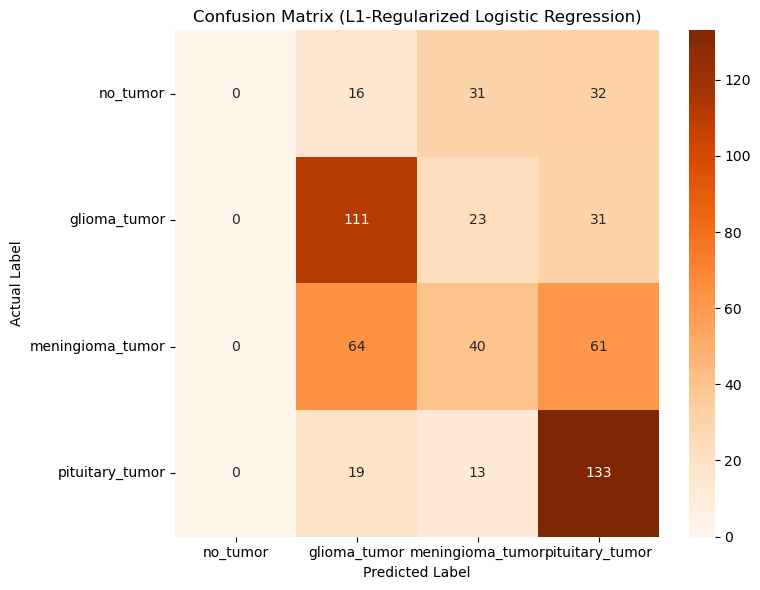


L1 selected 42245 features out of 46676 total features.


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

# Re-extract features WITHOUT PCA if not already done
X_no_pca, _ = extract_all_features(train_img, train_labels_encoded, use_pca=False)

# Split data into train/val sets
X_train_l1, X_val_l1, y_train_l1, y_val_l1 = train_test_split(
    X_no_pca, train_labels_encoded, test_size=0.2, random_state=42, stratify=train_labels_encoded
)

# Fit L1-regularized logistic regression (saga supports L1 for multiclass)
log_reg_l1 = LogisticRegression(
    penalty='l1', solver='saga', multi_class='multinomial', C=0.2, max_iter=2000, random_state=42
)
log_reg_l1.fit(X_train_l1, y_train_l1)

# Predict
y_pred_l1 = log_reg_l1.predict(X_val_l1)

# Evaluate
acc_l1 = accuracy_score(y_val_l1, y_pred_l1)
print(f"\nL1-Regularized Logistic Regression Accuracy: {acc_l1:.4f}")
print("\nClassification Report (L1):")
print(classification_report(y_val_l1, y_pred_l1, target_names=present_categories))

# Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_val_l1, y_pred_l1), annot=True, fmt='d', cmap='Oranges', 
            xticklabels=present_categories, yticklabels=present_categories)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix (L1-Regularized Logistic Regression)')
plt.tight_layout()
plt.show()

# Analyze how many features were selected (non-zero coefficients)
non_zero_mask = np.any(log_reg_l1.coef_ != 0, axis=0)
num_selected = np.sum(non_zero_mask)
print(f"\nL1 selected {num_selected} features out of {X_train_l1.shape[1]} total features.")